# BEATS TDR Chapter 07f_d: flux density @ sample
Plots of the white, pink and monochromatic flux density at the sample position.
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   22/02/2020

Last update:  28/08/2020
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
from pandas_ods_reader import read_ods
from matplotlib.ticker import ScalarFormatter
import h5py

In [2]:
%matplotlib inline

## White beam flux in 1x1mm^2 @ sample - XOP and Shadow simulations

Source flux file from a XOP simulation is available as .CSV ('3PW_flux.csv')
The file 'BEATS_BL_Flux_density_WB.csv' collects results from Shadow (rays through a pinhole at the sample position) for different photon energies and three different Hor. apertures of the primary slits (OPEN, 1mm, 0.5mm)

In [3]:
# read CSV file with Shadow results
names = ['E', 'E0', 'E1', 'I_20', 'FWHM_X', 'FWHM_Z', 'I', 'n']
# the last two columns are the intensity (or n. of good rays, I) and the Tot. rays (n)
FluxDensityWB_filecsv = 'Oasys/BEATS_BL_Flux_density_WB.csv'
FluxDensityWB = pd.read_csv(FluxDensityWB_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])

In [4]:
# read CSV file with three-pole wiggler flux from XOP
fluxdata = pd.read_csv('Oasys/3PW_flux.csv', sep=',', names=['E', 'F'], skiprows=[0])
# Sample XOP flux data @ the energies used for the Shadow simulation
F_source = np.zeros((18),dtype=np.float)
for i in range(0, 18):
    F_source[i] = fluxdata['F'][np.argmin(np.abs(float(FluxDensityWB['E'][i])-fluxdata['E']))]

F_source2 = np.zeros((10),dtype=np.float)
for i in range(0, 10):
    F_source2[i] = fluxdata['F'][np.argmin(np.abs(float(FluxDensityWB['E'][23+i])-fluxdata['E']))]

In [5]:
# Flux_density_WB = Flux_XOP * (n. good rays / Tot. rays)
Flux_d_1mrad = F_source*FluxDensityWB['I'][0:18].astype('float')/FluxDensityWB['n'][0:18].astype('float')
Flux_d_1mm = F_source2*FluxDensityWB['I'][23:33].astype('float')/FluxDensityWB['n'][23:33].astype('float')
Flux_d_05mm = F_source2*FluxDensityWB['I'][38:48].astype('float')/FluxDensityWB['n'][38:48].astype('float')

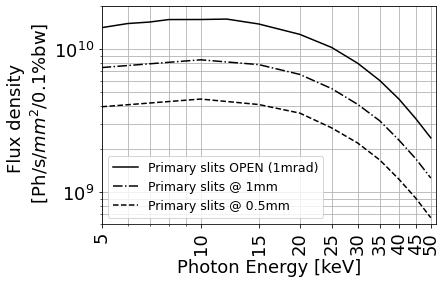

In [6]:
# plot of the flux @ 43m
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

f, ax = plt.subplots()
plt.plot(1e-3*FluxDensityWB['E'][0:18].astype('float'), Flux_d_1mrad, 'k')
plt.plot(1e-3*FluxDensityWB['E'][23:33].astype('float'), Flux_d_1mm, '-.k')
plt.plot(1e-3*FluxDensityWB['E'][38:48].astype('float'), Flux_d_05mm, '--k')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(5, 52), ylim=(6e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
plt.xticks(rotation=90)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['Primary slits OPEN (1mrad)', 'Primary slits @ 1mm', 'Primary slits @ 0.5mm'], loc='lower left', fontsize='x-small')
# f.savefig("BEATS_WB_flux_density_primary_slits.png", bbox_inches='tight', dpi=600)

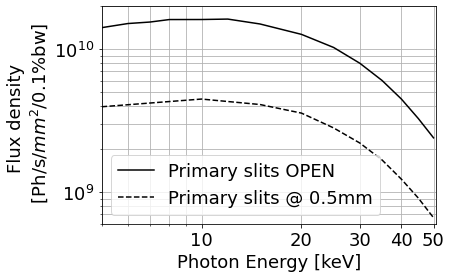

In [7]:
# same but larger
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

# plot of the flux @ 43m
f, ax = plt.subplots()
plt.plot(1e-3*FluxDensityWB['E'][0:18].astype('float'), Flux_d_1mrad, 'k')
plt.plot(1e-3*FluxDensityWB['E'][38:48].astype('float'), Flux_d_05mm, '--k')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(5, 51), ylim=(6e8, 2e10))
plt.xticks(np.arange(10, 60, 10))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['Primary slits OPEN', 'Primary slits @ 0.5mm', 'Primary slits @ 0.5mm'], loc='lower left')
# f.savefig("BEATS_WB_flux_density_primary_slitsOPEN_01.png", bbox_inches='tight', dpi=600)

In [7]:
# flux reduction closing slits to 0.5mm @ 20keV (11, 26, 41)
print(f"Flux density @ 20keV: OPEN -> 0.5mm: {100*(Flux_d_05mm[41]-Flux_d_1mrad[11])/Flux_d_1mrad[11]:0.1f} %")

Flux density @ 20keV: OPEN -> 0.5mm: -71.9 %


## Pink beam with filters - XOP and Shadow simulations

Transmissivity files were calculated with the Power widget in XOP and for different filter settings:
- Al [0.1, 0.2, 0.5, 1.0] [mm]
- Cu [10, 20, 50] [um]
- Fe [10, 50] [um]
- Pd [75 um]
- Graphite [5, 20] [mm]
- Diamond [0.7 mm]
- Air [1 m]

In [8]:
filters=['E', '100umAl', '200umAl', '500umAl', '1mmAl', '10umCu', '20umCu', '50umCu', '10umFe', '50umFe', '75umPd', '5mmGraphite', '20mmGraphite', '700umCVD', '1mAir', '1.5mmSi', '25umMo']

In [9]:
# read CSV trasnmissivity file
transmissivity = pd.read_csv('Oasys/transmissivity_BEATS_filters.csv', sep=',', names=filters, skiprows=[0])

In [10]:
# Sample transmissivity data @ the energies used for the Shadow simulation
T_data = np.zeros((18,17),dtype=np.float)
for i in range(0, 18):
    T_data[i,:] = transmissivity.loc[np.argmin(np.abs(float(FluxDensityWB['E'][i])-transmissivity['E']))]
    
T_data2 = np.zeros((10,17),dtype=np.float)
for i in range(0, 10):
    T_data2[i,:] = transmissivity.loc[np.argmin(np.abs(float(FluxDensityWB['E'][38+i])-transmissivity['E']))]

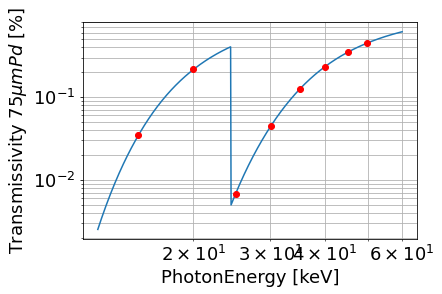

In [11]:
# check plot of the transmissivity of one filter
f, ax = plt.subplots()
plt.plot(1e-3*transmissivity['E'][200:], transmissivity['75umPd'][200:])
plt.plot(1e-3*T_data[10:,0], T_data[10:,10], 'or')
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Transmissivity $75 \mu m Pd$ [%]')
plt.grid(True, which="both")

### plots of the FILTERED pink beam flux @ 43m

In [12]:
T_CVD = T_data[:,13] # Transmissivity of 0.7 mm thick CVD diamond window

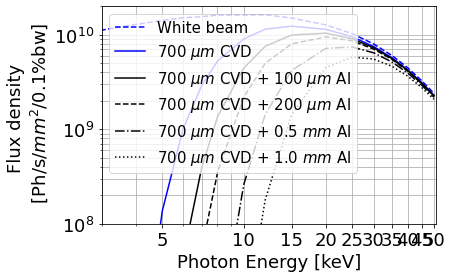

In [13]:
# Al FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, '--b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,1], 'k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,2], '--k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,3], '-.k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,4], ':k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(3, 51), ylim=(1e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam', '700 $\mu m$ CVD', '700 $\mu m$ CVD + 100 $\mu m$ Al', '700 $\mu m$ CVD + 200 $\mu m$ Al', '700 $\mu m$ CVD + 0.5 $mm$ Al', '700 $\mu m$ CVD + 1.0 $mm$ Al'], loc='upper left', fontsize="small")
# f.savefig("BEATS_PinkBeam_flux_density_Al-filter.png", bbox_inches='tight', dpi=600)

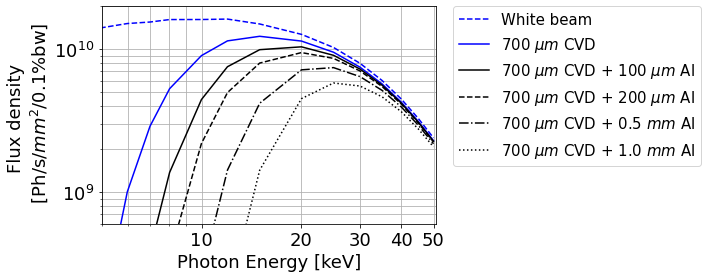

In [15]:
# Al FILTERS (again)
# same but larger
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, '--b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,1], 'k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,2], '--k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,3], '-.k')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,4], ':k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(5, 51), ylim=(6e8, 2e10))
plt.xticks(np.arange(10, 60, 10))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam', '700 $\mu m$ CVD', '700 $\mu m$ CVD + 100 $\mu m$ Al', '700 $\mu m$ CVD + 200 $\mu m$ Al', '700 $\mu m$ CVD + 0.5 $mm$ Al', '700 $\mu m$ CVD + 1.0 $mm$ Al'], bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize="small")
# plt.legend(['White beam', '700 $\mu m$ CVD', '700 $\mu m$ CVD + 100 $\mu m$ Al', '700 $\mu m$ CVD + 200 $\mu m$ Al', '700 $\mu m$ CVD + 0.5 $mm$ Al', '700 $\mu m$ CVD + 1.0 $mm$ Al'], loc='upper left', fontsize="xx-small")
# f.savefig("BEATS_PinkBeam_flux_density_Al-filter_01.png", bbox_inches='tight', dpi=600)

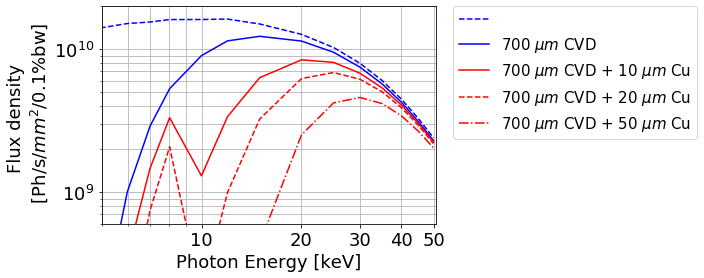

In [40]:
# Cu FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, '--b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,5], 'r')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,6], '--r')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,7], '-.r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(5, 51), ylim=(6e8, 2e10))
plt.xticks(np.arange(10, 60, 10))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['', '700 $\mu m$ CVD', '700 $\mu m$ CVD + 10 $\mu m$ Cu', '700 $\mu m$ CVD + 20 $\mu m$ Cu', '700 $\mu m$ CVD + 50 $\mu m$ Cu'], bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize="small")
f.savefig("BEATS_PinkBeam_flux_density_Cu-filter.png", bbox_inches='tight', dpi=600)

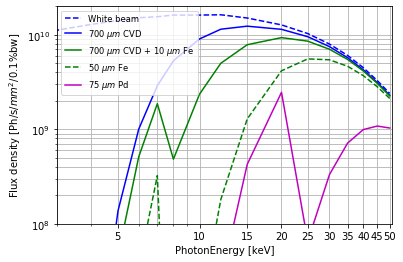

In [27]:
# Fe and Pd FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, '--b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,8], 'g')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,9], '--g')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,10], 'm')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(3, 51), ylim=(1e8, 2e10))
plt.xticks(np.arange(5, 55, 5))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('PhotonEnergy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam', '700 $\mu m$ CVD', '700 $\mu m$ CVD + 10 $\mu m$ Fe', '50 $\mu m$ Fe', '75 $\mu m$ Pd'], loc='upper left', fontsize="small")
f.savefig("BEATS_PinkBeam_flux_density_Fe-Pd-filter.png", bbox_inches='tight', dpi=600)

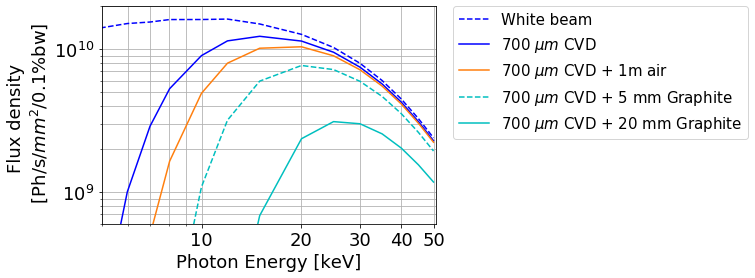

In [39]:
# C and air FILTERS
f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, '--b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD, 'b')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,14], 'C1')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,11], '--c')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,12], 'c')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(5, 51), ylim=(6e8, 2e10))
plt.xticks(np.arange(10, 60, 10))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam','700 $\mu m$ CVD', '700 $\mu m$ CVD + 1m air', '700 $\mu m$ CVD + 5 mm Graphite', '700 $\mu m$ CVD + 20 mm Graphite'], bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize="small")
f.savefig("BEATS_PinkBeam_flux_density_C-air-filter.png", bbox_inches='tight', dpi=600)

### Day-1 pink beam flux (slits OPEN and CLOSED)

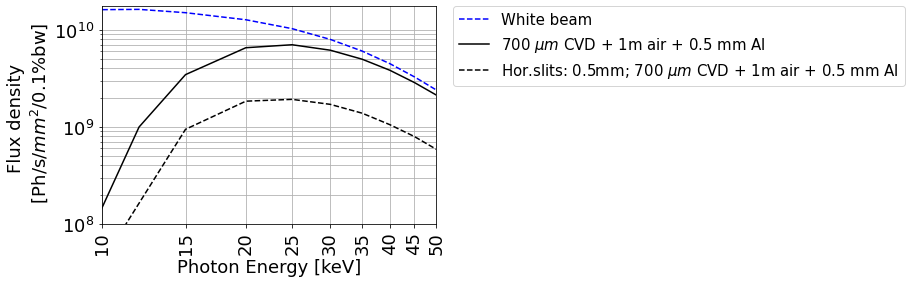

In [21]:
# Al FILTERS (again)
# same but larger
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

f, ax = plt.subplots()
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad, '--b')
# plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,14], 'C1')
plt.plot(1e-3*T_data[:,0], Flux_d_1mrad*T_CVD*T_data[:,14]*T_data[:,3], 'k')
plt.plot(1e-3*T_data2[:,0], Flux_d_05mm*T_data2[:,13]*T_data2[:,14]*T_data2[:,3], '--k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(10, 50), ylim=(1e8, 1.75e10))
plt.xticks(np.arange(10, 55, 5))
plt.xticks(rotation=90)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam', '700 $\mu m$ CVD + 1m air + 0.5 mm Al', 'Hor.slits: 0.5mm; 700 $\mu m$ CVD + 1m air + 0.5 mm Al'], bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize="small")
# plt.legend(['White beam', '700 $\mu m$ CVD', '700 $\mu m$ CVD + 100 $\mu m$ Al', '700 $\mu m$ CVD + 200 $\mu m$ Al', '700 $\mu m$ CVD + 0.5 $mm$ Al', '700 $\mu m$ CVD + 1.0 $mm$ Al'], loc='upper left', fontsize="xx-small")
f.savefig("BEATS_PinkBeam_flux_density_CVD_1mair_Al_SLITS_2.png", bbox_inches='tight', dpi=600)

In [51]:
# flux reduction closing slits to 0.5mm @ 50keV (11, 26, 41)
print(f"Flux density @ 50keV: OPEN -> 0.5mm: {100*(Flux_d_05mm[47]-Flux_d_1mrad[17])/Flux_d_1mrad[17]:0.1f} %")

Flux density @ 50keV: OPEN -> 0.5mm: -72.4 %


## Pink beam flux for Phase Contrast Imaging – examples from the science case 
#### Follow link to the notebook -> [BEATS TDR Chapter 07f: pink beam flux for Phase Contrast Imaging](BEATS_TDR-Chapter_07f_Optics_Raytracing-PinkBeamFlux-PCI.ipynb)

## REDO this after final DMM choice
## Flux density @ sample after monochromator - Primary slits OPEN

In [53]:
# read CSV file with Shadow results
names = ['E', 'E0', 'E1', 'theta', 'Itot', 'FWHM_X', 'FWHM_Z', 'I', 'I_1', 'n', 'BW']
# the last two columns are the intensity (or n. of good rays, I) and the Tot. rays (n)
FluxDensityDMM_filecsv = 'Oasys/BEATS_BL_Flux_density_DMM.csv'
FluxDensity = pd.read_csv(FluxDensityDMM_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])

#### Flux density @ DMM BW plot

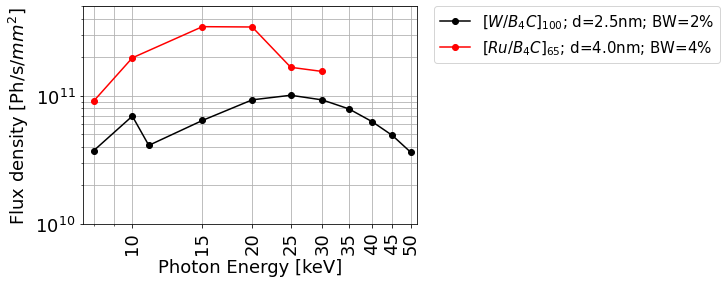

In [62]:
# plot of the flux density @ 43m
f, ax = plt.subplots()
plt.plot(1e-3*FluxDensity['E'][0:11].astype('float'), FluxDensity['I'][0:11].astype('float'), 'o-k')
plt.plot(1e-3*FluxDensity['E'][20:26].astype('float'), FluxDensity['I'][20:26].astype('float'), 'o-r')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(np.arange(5, 65, 5))
plt.xticks(rotation=90)
# plt.yticks(np.arange(1e10, 5e11, 5e10))
ax.set(xlim=(7.5, 52), ylim=(1e10, 5e11))
ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$]')
plt.grid(True, which="both")
plt.legend(['$[W/B_{4}C]_{100}$; d=2.5nm; BW=2%', '$[Ru/B_{4}C]_{65}$; d=4.0nm; BW=4%'],  bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize='small')
f.savefig("BEATS_DMM_flux_density_DMMBW.png", bbox_inches='tight', dpi=600)

#### Flux density in 0.1%BW plot

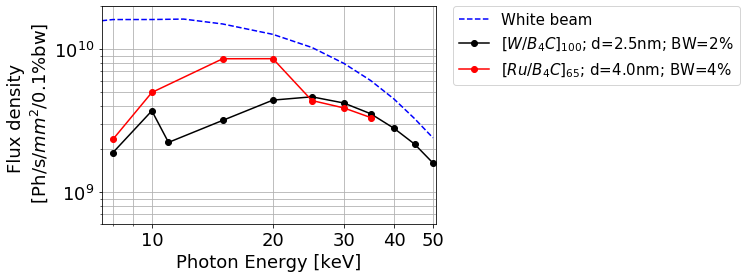

In [54]:
# plot of the flux density @ 43m
f, ax = plt.subplots()
plt.plot(1e-3*FluxDensityWB['E'][0:18].astype('float'), Flux_d_1mrad, '--b')
plt.plot(1e-3*FluxDensity['E'][0:11].astype('float'), FluxDensity['I_1'][0:11].astype('float')/10, 'o-k')
plt.plot(1e-3*FluxDensity['E'][20:28].astype('float'), FluxDensity['I_1'][20:28].astype('float')/10, 'o-r')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set(xlim=(5, 51), ylim=(6e8, 2e10))
plt.xticks(np.arange(10, 60, 10))
# plt.yticks(np.arange(1, 18, 2)*1e9)
# ax.set(xlim=(7.5, 52), ylim=(0.9e9, 3e10))
ax.set(xlim=(7.5, 51), ylim=(6e8, 2e10))
ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density \n [Ph/s/$mm^2$/0.1%bw]')
plt.grid(True, which="both")
plt.legend(['White beam', '$[W/B_{4}C]_{100}$; d=2.5nm; BW=2%', '$[Ru/B_{4}C]_{65}$; d=4.0nm; BW=4%'], bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize='small')
f.savefig("BEATS_DMM_flux_density_0.1%BW_01.png", bbox_inches='tight', dpi=600)

In [193]:
# flux reduction closing slits to 0.5mm @ 20keV (4, 11, 23)
print(f"W/B4C Flux density @ 25keV: OPEN -> 0.5mm: {100*((float(FluxDensity['I_1'][5])/10)-Flux_d_1mrad[12])/Flux_d_1mrad[12]:0.1f} %")
print(f"Ru/B4C Flux density @ 20keV: OPEN -> 0.5mm: {100*((float(FluxDensity['I_1'][23])/10)-Flux_d_1mrad[11])/Flux_d_1mrad[11]:0.1f} %")

W/B4C Flux density @ 25keV: OPEN -> 0.5mm: -54.9 %
Ru/B4C Flux density @ 20keV: OPEN -> 0.5mm: -32.5 %
